In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [6]:
health_insurance = pd.read_csv("C:\\Users\\susen\\Downloads\\healthcare medical project dataset\\insurance.csv")
health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
health_insurance.shape

(1338, 7)

In [8]:
health_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
health_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
health_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
health_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
health_insurance.duplicated().any()

True

In [14]:
health_insurance[health_insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
health_insurance1 = health_insurance.drop_duplicates()

In [16]:
health_insurance1.shape

(1337, 7)

In [17]:
health_insurance1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [18]:
health_insurance1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
Numerical_columns = health_insurance1.select_dtypes(include ="number").columns.to_list()
categorical_columns = health_insurance1.select_dtypes(exclude ="number").columns.to_list()
print(f'Numerical columns in the data: {Numerical_columns}')
print(f'categorical columns in the data: {categorical_columns}')

Numerical columns in the data: ['age', 'bmi', 'children', 'charges']
categorical columns in the data: ['sex', 'smoker', 'region']


In [20]:
health_insurance1.describe(include = "number")

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
health_insurance1.describe(exclude = "number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [22]:
health_insurance1.sex.unique()

array(['female', 'male'], dtype=object)

In [23]:
health_insurance1.sex.nunique()

2

In [24]:
health_insurance1.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [35]:
print(health_insurance1.smoker.unique())
print()
print(health_insurance1.smoker.nunique())
print()
print(health_insurance1.smoker.value_counts())
print()

['yes' 'no']

2

no     1063
yes     274
Name: smoker, dtype: int64



In [36]:
print(health_insurance1.region.unique())
print()
print(health_insurance1.region.nunique())
print()
print(health_insurance1.region.value_counts())
print()

['southwest' 'southeast' 'northwest' 'northeast']

4

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64



# Data visualization

In [25]:
Numerical_columns

['age', 'bmi', 'children', 'charges']

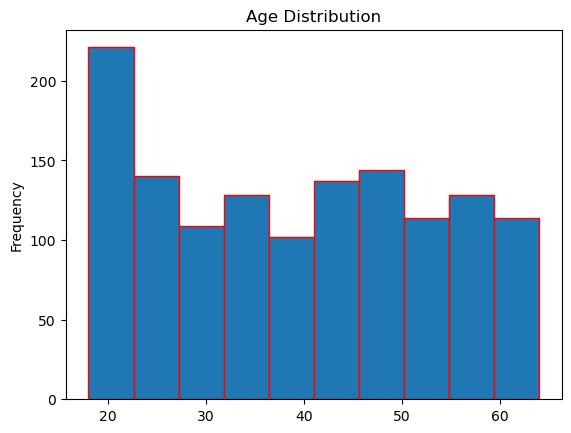

In [168]:
health_insurance1["age"].plot(kind = "hist",ec="red")
plt.title("Age Distribution")
plt.show()

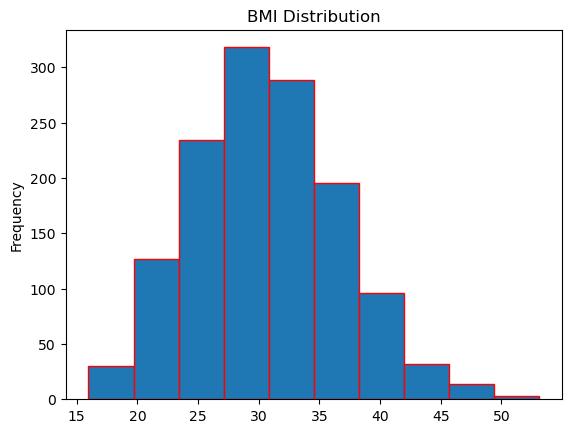

In [138]:
health_insurance1["bmi"].plot(kind = "hist",ec="red")
plt.title("BMI Distribution")
plt.show()

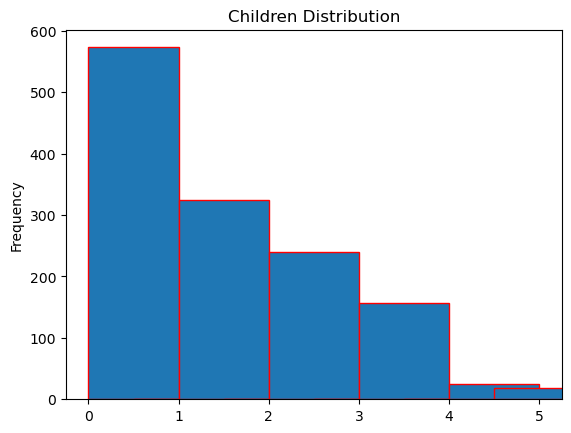

In [153]:
health_insurance1["children"].plot(kind = "hist",width =1,ec="red")
plt.title("Children Distribution")
plt.show()

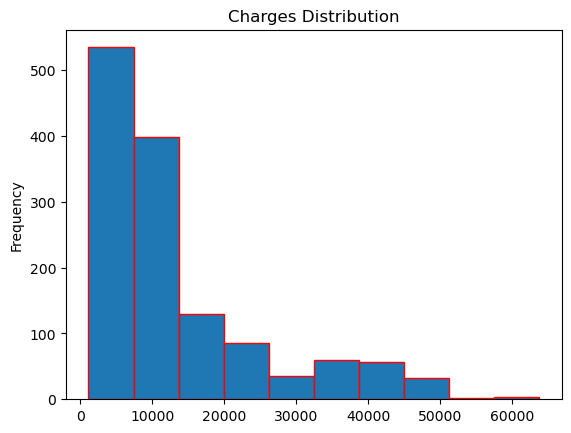

In [151]:
health_insurance1["charges"].plot(kind = "hist",ec="red")
plt.title("Charges Distribution")
plt.show()

# Bar Graph - Categorical Columns

In [116]:
by_sex = health_insurance1["sex"].value_counts()

<Axes: >

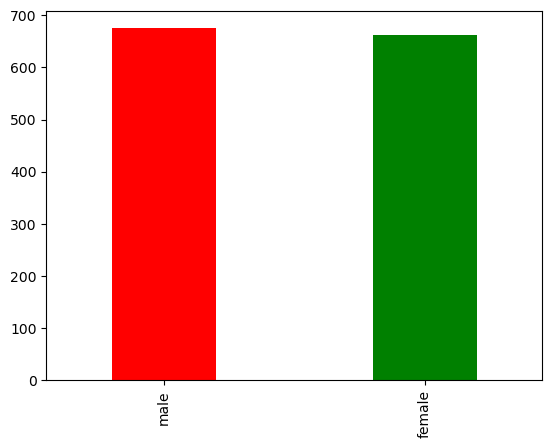

In [133]:
by_sex.plot(kind = "bar",width = 0.4, color = ["red","green"])

In [135]:
by_region = health_insurance1["region"].value_counts()

<Axes: >

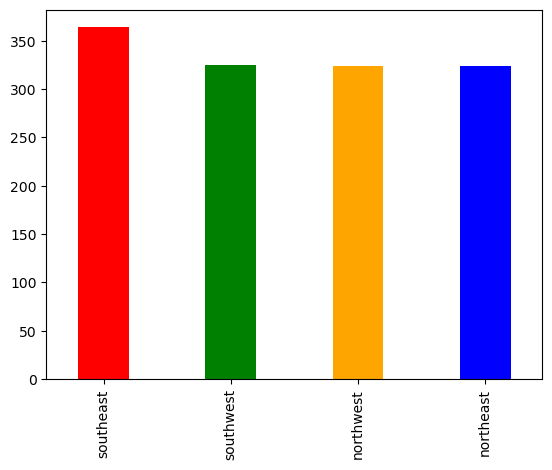

In [136]:
by_region.plot(kind = "bar",width = 0.4, color = ["red","green","orange","blue"])

# Box plot - Numeric columns

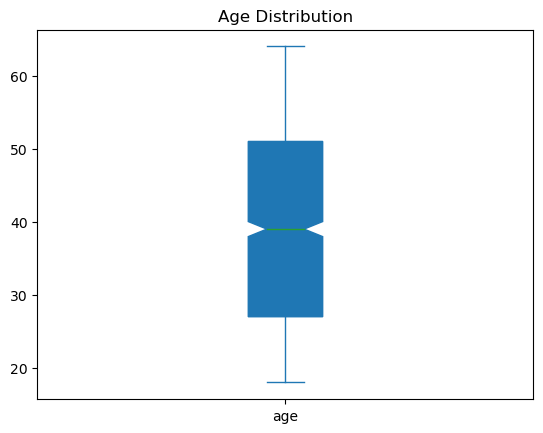

In [165]:
health_insurance1["age"].plot(kind = "box",notch = True, patch_artist = True)
plt.title("Age Distribution")
plt.show()

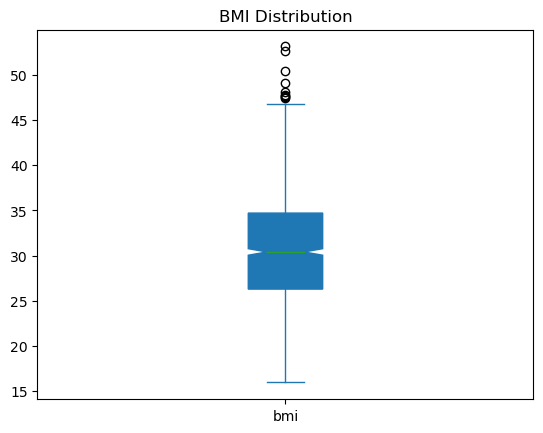

In [166]:
health_insurance1["bmi"].plot(kind = "box",notch = True, patch_artist = True)
plt.title("BMI Distribution")
plt.show()

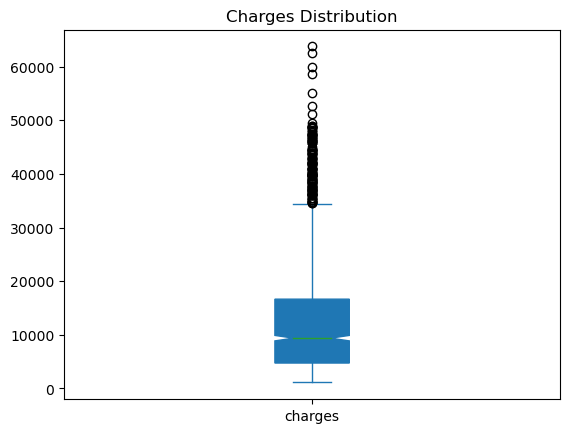

In [167]:
health_insurance1["charges"].plot(kind = "box",notch = True, patch_artist = True)
plt.title("Charges Distribution")
plt.show()

# Pie Chart - Region

In [48]:
region_count = health_insurance1["region"].value_counts()
region_count

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

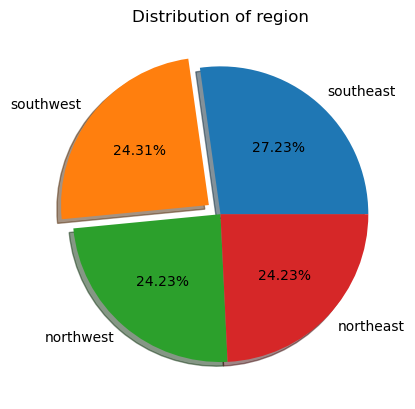

In [69]:
plt.pie(labels = region_count.index,
         x = region_count.values,
         shadow = True,
         autopct = "%.2f%%",
         explode = (0, 0.1, 0, 0))
plt.title("Distribution of region")
plt.show()

# correlation Matrix

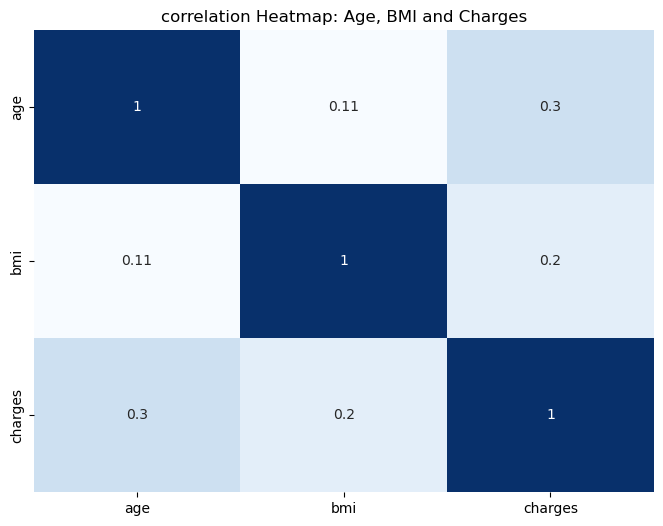

In [79]:
corr_data = health_insurance1[["age", "bmi", "charges"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(round(corr_data, 2),annot = True, cmap = "Blues", cbar = False)
plt.title("correlation Heatmap: Age, BMI and Charges")
plt.show()

# scatter plot

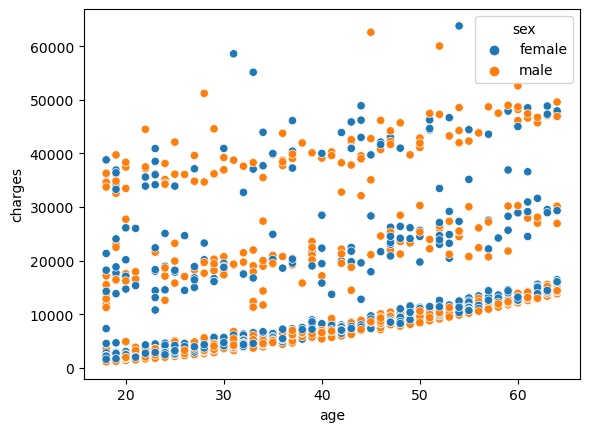

In [174]:
sns.scatterplot(data = health_insurance1, x = "age", y = "charges",hue="sex")
plt.show()

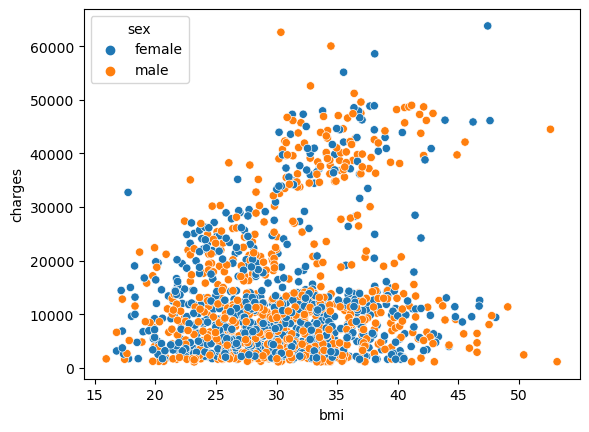

In [175]:
sns.scatterplot(data = health_insurance1, x = "bmi", y = "charges",hue="sex")
plt.show()

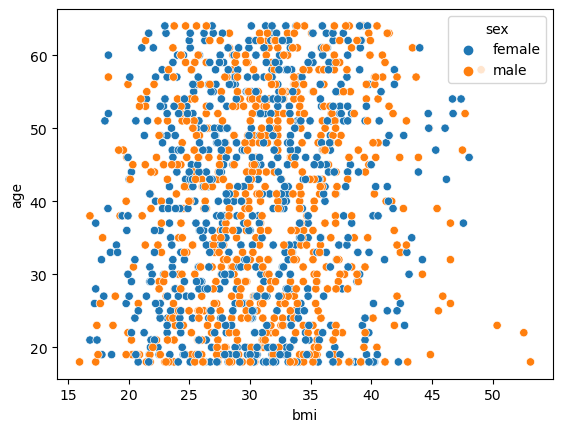

In [176]:
sns.scatterplot(data = health_insurance1, x = "bmi", y = "age",hue="sex")
plt.show()

# Insurance cost for Smoker and Non-Smoker

In [84]:
smoker_df = health_insurance1.groupby("smoker")["charges"].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

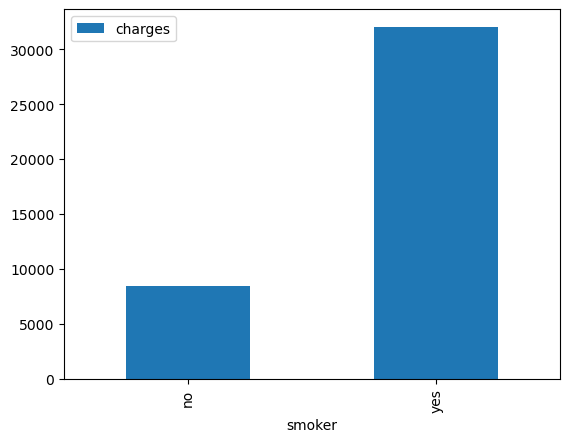

In [85]:
smoker_df.plot(kind = "bar", x = "smoker", y = "charges")

# Insurance cost for Male and Female

In [88]:
gender_df = health_insurance1.groupby("sex")["charges"].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

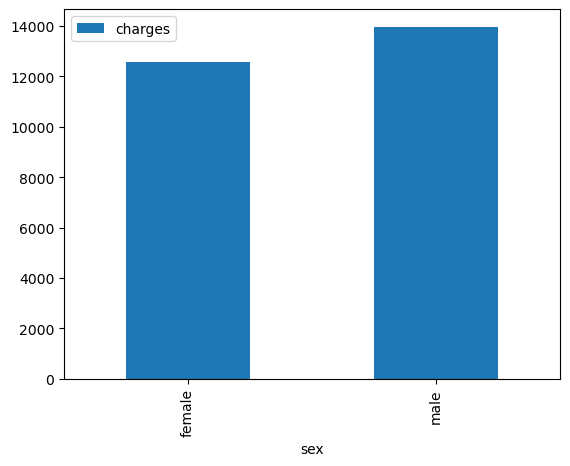

In [89]:
gender_df.plot(kind = "bar", x = "sex", y = "charges")

# Region wise Insurance cost

In [90]:
region_df = health_insurance1.groupby("region")["charges"].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

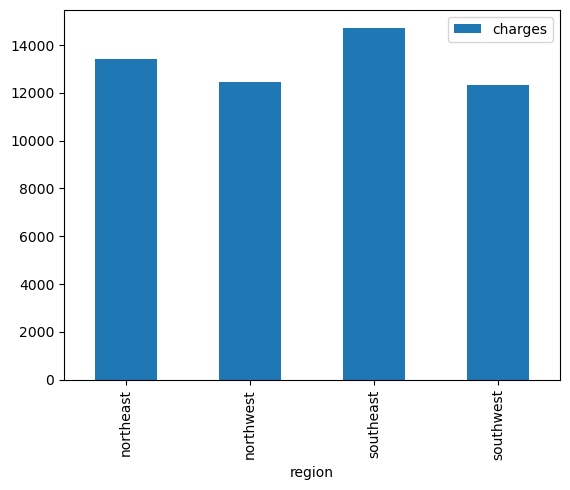

In [91]:
region_df.plot(kind = "bar", x = "region", y = "charges")

# Region wise BMI

In [92]:
region_bmi_df = health_insurance1.groupby("region")["bmi"].mean().reset_index()
region_bmi_df

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: xlabel='region'>

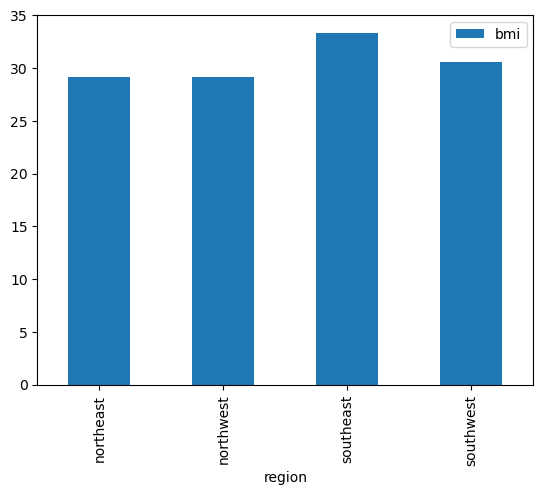

In [95]:
region_bmi_df.plot(kind = "bar", x = "region", y = "bmi")

# Region wise Male & Female and Cost

In [96]:
health_insurance1.groupby(["region", "sex"])["sex"].count()

region     sex   
northeast  female    161
           male      163
northwest  female    164
           male      160
southeast  female    175
           male      189
southwest  female    162
           male      163
Name: sex, dtype: int64